# Классификатор на основе логистической регрессии

**Цель лабораторной работы:**

Познакомиться с методикой и инструментарием создания бинарного классификатора на основе логистической регрессии с использованием библиотеки scikit-learn.

**Автор работы:**

|Выполнил(а)| Группа | Дата |
|---|---|---|
| ФИО | Группа | Дата |

## Введение в классификацию

`Классификация` — это подкатегория обучения с учителем, где процесс категоризации заданного набора данных в классы. Такие классы, как Хороший/Плохой ( обзоры), Спам/Не спам ( электронные письма) или Положительный/Отрицательный/Нейтральный (твиты). Это может быть выполнено как со структурированными, так и с неструктурированными данными. Процесс начинается с прогнозирования класса заданных точек данных. `Классы` часто называют целевыми, метками или категориями.

`Классификационное прогностическое моделирование` представляет собой задачу аппроксимации функции отображения входных переменных в дискретные выходные переменные. Основная цель — определить, к какому классу/категории относятся новые данные.

Существует два основных типа задач классификации:

- `Двоичная классификация`: типичным примером является обнаружение спама в электронной почте, при котором каждое электронное письмо является спамом → 1 спам; или нет → 0.

- `Многоклассовая классификация`: как распознавание рукописных символов (где классы идут от 0 до 9).

Попробуем понять это на примере.

Всякий раз, когда мы получаем электронное письмо, классификатор спама классифицирует его. Классификатор использует обработку естественного языка с ML для обработки полученного текста по почте. Затем он принимает решение на основе типов слов или предложений, используемых в почте. Затем он классифицирует, является ли эта почта спамом или нет.

Реальное применение классификации:

- Распознавание речи
- Классификация спама
- Распознавание лиц
- Распознавание рукописного ввода

Типы обучающихся в классификации:

- `Ленивые учащиеся` — ленивые учащиеся просто сохраняют данные обучения и ждут, пока не появятся данные тестирования. Классификация выполняется с использованием наиболее связанных данных в сохраненных обучающих данных. У них больше времени на прогнозирование по сравнению с нетерпеливыми учениками. Например, алгоритмы k-ближайшего соседа, рассуждения по прецедентам.

- `Нетерпеливые учащиеся` — нетерпеливые учащиеся строят модель классификации на основе данных обучения, прежде чем получать данные для прогнозов. Они должны быть в состоянии принять единую гипотезу, которая будет работать для всего пространства. За счет этого они занимают много времени на обучение и меньше времени на прогноз. Например, алгоритмы дерева решений, наивный байесовский алгоритм, искусственные нейронные сети.

## Почему линейная регрессия не подходит для решения задачи классификации

Допустим, мы создаем идеально сбалансированный набор данных, содержащий список клиентов и метку, позволяющую определить, совершил ли клиент покупку. В наборе данных 20 клиентов; 10 клиентов в возрасте от 10 до 19 лет, которые совершили покупку, и 10 клиентов в возрасте от 20 до 29 лет, которые не совершили покупку. 

«Куплено» — это бинарная метка, обозначаемая 0 и 1, где 0 означает «покупатель не совершал покупку», а 1 — «покупатель совершил покупку».

`Цель модели линейной регрессии` — найти взаимосвязь между входными переменными и целевой переменной. Ниже представлена ​​наша модель линейной регрессии, которая была обучена с использованием приведенного выше набора данных. 

Красная линия лучше всего подходит для обучающего набора данных, целью которого является минимизация расстояния между прогнозируемым значением и фактическим значением.

`Первая проблема с линейной регрессией:` она выводит непрерывные ответы, тогда как нам нужны только два ответа «0» или «1». Поскольку это просто бинарная классификация, мы можем решить эту проблему, заявив, что если Y больше 0.5, предсказать, что этот клиент будет совершать покупки, в противном случае не будет делать покупки. Но это не будет работать в `многоклассовом классификаторе`.

`Вторая задача «Эффект выбросов»:` что если мы добавим еще 10 клиентов в возрасте от 60 до 70 лет и обучим нашу модель линейной регрессии. Наша модель линейной регрессии будет соответствовать новой линии, но результаты некоторых клиентов (в возрасте от 20 до 22 лет) будут предсказыватся неправильно. Поскольку линейная регрессия пытается соответствовать линии регрессии, минимизируя ошибку прогноза, чтобы минимизировать расстояние между прогнозируемым и фактическим значением для клиентов в возрасте от 60 до 70 лет. Это может быть решено только с помощью `логистической регрессии`.

## Понятие логистической регрессии

`Логистическая регрессия` — это алгоритм классификации, используемый для распределения наблюдений по дискретному набору классов. В отличие от линейной регрессии, которая выводит непрерывные числовые значения, логистическая регрессия преобразует свои выходные данные с помощью логистической сигмовидной функции, чтобы вернуть значение вероятности, которое затем может быть сопоставлено с двумя или более дискретными классами.

### Сигмовидная/логистическая функция

$p =1 / 1 + e^{-y}$

### Свойства логистической регрессии

* Зависимая переменная подчиняется распределению Бернулли.
* Оценка представляет собой оценку максимального правдоподобия (MLE)

### Преимущества
* Проста в реализации, не требует больших вычислительных мощностей, легко интерпретируется, широко используется.
* Не требует масштабирования функций и предоставляет оценку вероятности для наблюдений.

### Недостатки
* Не в состоянии обрабатывать большое количество функций/переменных категорий.
* Подвержена к переобучению.

`Бинарная логистическая регрессия` предсказывает два значения, например да/нет. Наш предыдущий пример, купит ли клиент продукт или нет, является примером `бинарной логистической регрессии`.

## Функция стоимости

В логистической регрессии не используют ту же функцию стоимости (MSE), что и для линейной регрессии. Потому что здесь функция предсказания нелинейна из-за сигмовидного преобразования. Таким образом, MSE приведет к множеству локальных минимумов, и градиентный спуск может не найти оптимальный глобальный минимум.

Вместо среднеквадратичной ошибки мы используем функцию стоимости, называемую `перекрестной энтропией`, также известную как `логарифмическая потеря`. Кросс-энтропийные потери можно разделить на две отдельные функции стоимости: одну для y=1 и одну для y=0.

Преимущества логарифмирования становятся очевидными, когда мы смотрим на графики функции стоимости для y=1 и y=0. Эти гладкие монотонные функции (всегда возрастающие или всегда убывающие) упрощают вычисление градиента и минимизируют затраты.

`Важно отметить, что функция стоимости наказывает за уверенные и неправильные прогнозы больше, чем вознаграждает за уверенные и правильные прогнозы!`

## Градиентный спуск

Чтобы минимизировать наши затраты, мы используем `градиентный спуск`, как и раньше в линейной регрессии. 

Существуют и другие более сложные алгоритмы оптимизации, такие как `сопряженный градиент`, подобный `BFGS (пакетный градиентный спуск)`, но нам не нужно беспокоиться об этом. Библиотеки машинного обучения, такие как Scikit-learn, скрывают свои реализации, чтобы можно было сосредоточиться на более интересных вещах!

Из-за того, что эта базовая технология очень похожа на линейную «регрессию», этот алгоритм также называется `логистической «регрессией»`.

## Мультиклассовая логистическая регрессия

Вместо y=0,1 мы расширим наше определение так, чтобы y=0,1…n. Мы повторно запускаем бинарную классификацию несколько раз, по одному разу для каждого класса.

Процедура:

- Разделить задачу на n+1 задач бинарной классификации (+1, потому что индекс начинается с 0?).

- Предсказать вероятность того, что наблюдения относятся к этому единственному классу.

- прогноз = макс(вероятность классов)

Для каждой подзадачи мы выбираем один класс (ДА) и объединяем все остальные во второй класс (НЕТ). Затем мы берем класс с наибольшим прогнозируемым значением. Здесь мы используем `функцию SOFTMAX`, чтобы сделать это.

`Регрессия SoftMax` — это форма логистической регрессии, которая нормализует входное значение в вектор значений, который следует распределению вероятностей, общая сумма которых равна 1. Выходные значения находятся в диапазоне [0,1], что хорошо, потому что мы можем избежать бинарную классификацию и разместить как можно больше классов или измерений в нашей модели нейронной сети. 

Эта функция предполагает использование искусственной нейронной сети. Вот почему SoftMax иногда называют `полиномиальной логистической регрессией`.

## Оценка модели классификации

`Матрица путаницы` — это таблица, которая часто используется для описания производительности модели классификации (или «классификатора») на наборе тестовых данных, для которых известны истинные значения. 

Сама матрица путаницы относительно проста для понимания, но связанная с ней терминология может сбивать с толку. Говоря простым языком, когда одинаковые типы значений совпадают, т.е. TP и TN являются `правильно предсказанными значениями`.

## Пример выполнения классификации

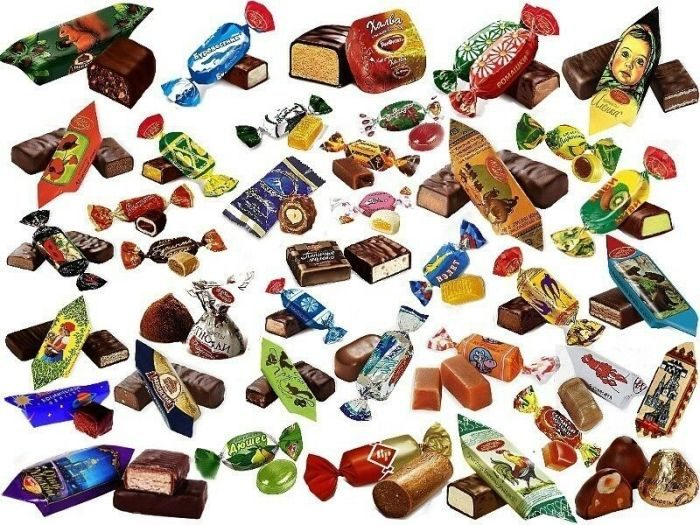

При выборе конфет, мы всегда задаемся вопросом: сколько в них шоколада? Давайте создадим модель предсказания (классификатора), с помощью логистической регрессии. 

Наш набор данных доступен по [ссылке](https://github.com/fivethirtyeight/data/blob/master/candy-power-ranking/candy-data.csv)

### 1. Импорт необходимых модулей

Импортируем те модули, которые нам понадобятся для работы.

In [42]:
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
import pandas as pd
import io
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.rc("font", size = 14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns; sns.set()
sns.set(style="white")
sns.set(style="whitegrid", color_codes = True)

### 2. Импорт данных и их разделение

Выполним импорт данных в DataFrame Pandas.

In [44]:
df = pd.read_csv('https://github.com/SerjiEvg/data-analysis/raw/main/data/choco_data.csv')
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


У нас имеется следующий набор столбцов: **'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus','sugarpercent', 'pricepercent', 'winpercent', 'chocolate'**

**'fruity'** - наличие фректовой начинки (0 - нет, 1 - есть)

**'caramel'** - наличие карамельной начинки

**'peanutyalmondy'** - наличие орехов (арахис/миндаль)

**'nougat'** - наличие нуги

**'crispedricewafer'** - наличие рисовой вафли

**'hard'** - твердая/мягкая конфета

**'bar'** - прямоугольная форма или нет

**'pluribus'** - разделение на части или нет

**'sugarpercent'** - процент сахара

**'winpercent'** - процент ликера

**'chocolate'** - наличие шоколада


In [45]:
df = df[['fruity','caramel','peanutyalmondy','nougat','crispedricewafer','hard', 
         'bar','pluribus','sugarpercent','pricepercent','winpercent','chocolate']]
df.head()        

,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,chocolate
0,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,1
1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,1
2,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,0
3,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,0
4,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,0


Разделим наш датасет на обучающий и тестовый наборы в пропорции 80%:20%

In [52]:
from sklearn.model_selection import train_test_split
trainingSet, testSet = train_test_split(df, test_size=0.2)

In [62]:
trainingSet.shape

(68, 12)

In [63]:
testSet.shape

(17, 12)

Сформируем DataFrame для обучающего и тестового набора данных. Если потребуется, то можно выполнить очистку данных:
```
train_df = train_df.dropna()
test_df = test_df.dropna()
```

In [53]:
train_df = trainingSet
test_df = testSet

In [55]:
train_df.head()

,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,chocolate
52,0,0,1,0,0,0,0,0,0.720,0.651,84.180290,1
7,0,0,1,0,0,0,0,1,0.313,0.511,23.417824,0
83,0,1,0,0,0,1,0,0,0.186,0.267,41.904308,0
48,0,0,0,0,0,0,0,1,0.093,0.023,37.722336,0
18,1,0,0,0,0,0,0,1,0.465,0.465,57.119740,0


In [56]:
test_df.head()

,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,chocolate
43,0,0,0,0,1,0,1,0,0.313,0.767,66.470680,1
58,1,0,0,0,0,1,0,1,0.872,0.279,42.849144,0
64,0,1,1,1,0,0,1,0,0.546,0.651,76.673782,1
77,0,0,0,0,0,0,1,0,0.465,0.325,49.653503,1
27,0,0,0,0,0,0,0,1,0.197,0.511,57.219250,1


Поскольку данные уже разделены на наборы данных Train и Test, можно загрузить значения в X_train, X_test, y_train, y_test. Обратите внимание, что мы отделяем признак классификации "chocolate" и формируем отдельный DataFrame:

In [67]:
X_train = train_df[['fruity','caramel','peanutyalmondy','nougat','crispedricewafer','hard', 
                    'bar','pluribus','sugarpercent','pricepercent','winpercent']] 	
y_train = train_df["chocolate"]

X_test = test_df[['fruity','caramel','peanutyalmondy','nougat','crispedricewafer','hard', 
                  'bar','pluribus','sugarpercent','pricepercent','winpercent']] 	
y_test = test_df["chocolate"]



Посмотрим, что у нас сформировалось в y_test:

In [68]:

y_test.head()

43    1
58    0
64    1
77    1
27    1
Name: chocolate, dtype: int64

### 3. Исследование данных

С помощью функции value_counts() мы можем посмотреть сколько у нас имеется уникальных значений. Так как в y_train всего два столбца - индексы строк и значения о наличии/отсутствии шоколада, то получаем два уникальных класса:

0 - класс конфет, где присутствует шоколад

1 - класс конфет, где шоколад отсутствует.

In [69]:
y_train.value_counts()

0    39
1    29
Name: chocolate, dtype: int64

Проиллюстрируем это на диаграмме, чтобы ощутить пропорции.

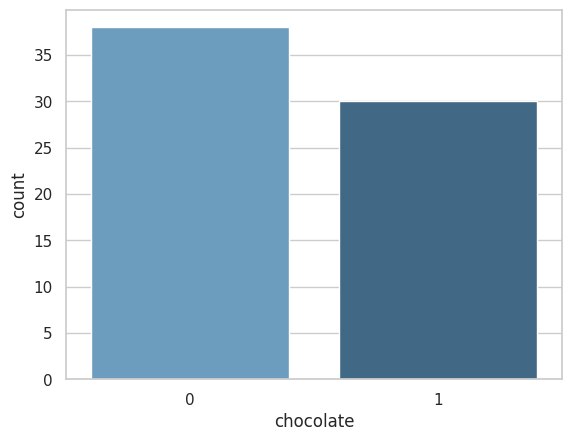

<Figure size 640x480 with 0 Axes>

In [17]:
sns.countplot(data=train_df, x='chocolate', palette='Blues_d')
plt.show()
plt.savefig('count_plot')

Если нам нужно отразить это в процентном соотношении, то можно посчитать так:

In [72]:
count_no_choc = len(train_df[train_df['chocolate']==0])
count_choc = len(train_df[train_df['chocolate']==1])
pct_of_no_choc = count_no_choc/(count_no_choc+count_choc)
print("Процент конфет без шоколада:", pct_of_no_choc*100)
pct_of_choc = count_choc/(count_no_choc+count_choc)
print("Процент конфет с шоколадом:", pct_of_choc*100)


Процент конфет без шоколада: 57.35294117647059
Процент конфет с шоколадом: 42.64705882352941


Посмотрим усредненные значения других признаков для выделенных двух классов: 

In [14]:
train_df.groupby('chocolate').mean()

,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
chocolate,,,,,,,,,,,
0,0.710526,0.105263,0.052632,0.026316,0.0,0.263158,0.026316,0.657895,0.464263,0.345263,42.186190
1,0.033333,0.266667,0.300000,0.133333,0.2,0.033333,0.533333,0.366667,0.502933,0.629367,58.633949


И для примера усредненные значения признаков, если бы мы выделяли классы по наличию карамельной начинки в конфетах:

In [15]:
train_df.groupby('caramel').mean()

,fruity,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,chocolate
caramel,,,,,,,,,,,
0,0.482143,0.160714,0.035714,0.071429,0.178571,0.196429,0.589286,0.449179,0.441357,48.527744,0.392857
1,0.083333,0.166667,0.250000,0.166667,0.083333,0.500000,0.250000,0.631333,0.607083,53.711668,0.666667


### 4. Разработка модели, ее обучение и прогнозирование


Импортируем модуль логистической регрессии Scikit Learn.
Подгонка модели к набору произведем с помощью fit(), а затем выполним прогнозирование по тестовому набору

In [73]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

Если понадобится выполнять предстазание "вручную", то можно извлекать строки из набора, либо формировать аналогичный набор данных и подставлять эти данные в функцию предсказания нашей модели.

In [77]:
X1_test = X_test.iloc[0:2]
X1_test

,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
43,0,0,0,0,1,0,1,0,0.313,0.767,66.470680
58,1,0,0,0,0,1,0,1,0.872,0.279,42.849144


In [78]:
y_pred = logreg.predict(X1_test)
y_pred

array([1, 0])

### 5. Оценка модели с помощью матрицы путаницы

Построение матрицы путаницы даст нам информацию о том, насколько хорошо модель делает прогнозы.

In [19]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[10,  0],
       [ 0,  7]])

Сделаем визуализацию матрицы путаницы с помощью тепловой карты

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 427.9555555555555, 'Predicted label')

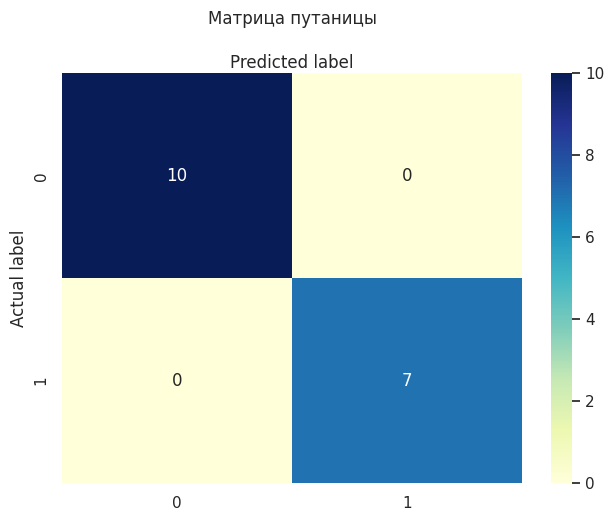

In [79]:
class_names=[0,1] # имена классов
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Матрица путаницы', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Сформируем также показатели оценки: долю правильных ответов, точность, полноту

In [ ]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.8823529411764706
Precision: 0.7777777777777778
Recall: 1.0


## Задание 1

Используя тот же самый набор данных создайте модель бинарного классификатора по такому признаку, как наличие карамельной начинки в конфетах. Используйте разделение дянных в пропорции 60%:40%. Выполните оценку качества работы модели.

## Задание 2

У нас есть набор данных, который доступен по [ссылке](https://github.com/SerjiEvg/data-analysis/raw/main/data/conc_data.csv)

Бетон является важнейшим материалом в строительстве, а прочность бетона
на сжатие является сильно нелинейной функцией возраста и
ингредиентов. Эти ингредиенты включают цемент, доменный шлак, летучую золу,
воду, суперпластификатор, крупный заполнитель и мелкий заполнитель.

В наборе имеются данные:

**'cement'** - цемент (кг/м3 смеси)

**'blast_furnace_slag'** - доменный шлак (кг/м3 смеси)

**'fly_ash'** - зола-уноса (кг/м3 смеси)

**'water'** - вода (кг/м3 смеси)

**'superplasticizer'** - суперпластификатор (кг/м3 смеси)

**'coarse_aggregate'** - крупный заполнитель (кг/м3 смеси)

**'fine_aggregate'** - мелкий заполнитель (кг/м3 смеси)

**'age'** - возраст (в днях (1~365))

**'concrete_compressive_strength'** - прочность бетона на сжатие (МПа)


Сформируйте бинарный классификатор, который будет формировать предсказание о подходящих параметрах бетона для начала строительства. Подходящим считаем бетон с прочностью, большей 44,95 МПа (марка бетона М450 и выше). Выполните оценку модели. 